In [1]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.
  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary
  u_D = 1 + x^2 + 2y^2
    f = -6
"""
import dolfin 
import ufl
import matplotlib.pyplot as plt

# Create mesh and define function space


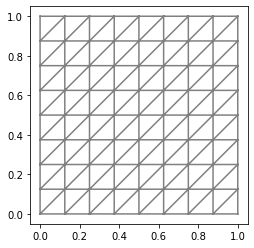

In [2]:
mesh = dolfin.UnitSquareMesh(8, 8)
V = dolfin.FunctionSpace(mesh, 'P', 1)
dolfin.plot(mesh)

# Define variational problem

In [6]:
u = dolfin.TrialFunction(V)
v = dolfin.TestFunction(V)
f = dolfin.Constant(-6.0)
a = ufl.dot(.1*ufl.grad(u), ufl.grad(v))*dolfin.dx
L = f*v*dolfin.dx

# Define boundary condition

In [7]:
u_D = dolfin.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
def boundary(x, on_boundary):
    return on_boundary
bc = dolfin.DirichletBC(V, u_D, boundary)

In [13]:
A, b = dolfin.assemble_system(a,L,bc)

# Compute solution

In [16]:
u = dolfin.Function(V,name="u")
dolfin.solve(A,u.vector(),b,"mumps")

1

In [21]:
dolfin.linear_solver_methods()

{'bicgstab': 'Biconjugate gradient stabilized method',
 'cg': 'Conjugate gradient method',
 'default': 'default linear solver',
 'gmres': 'Generalized minimal residual method',
 'minres': 'Minimal residual method',
 'mumps': 'MUMPS (MUltifrontal Massively Parallel Sparse direct Solver)',
 'petsc': 'PETSc built in LU solver',
 'richardson': 'Richardson method',
 'tfqmr': 'Transpose-free quasi-minimal residual method',
 'umfpack': 'UMFPACK (Unsymmetric MultiFrontal sparse LU factorization)'}

# Plot and save the solution

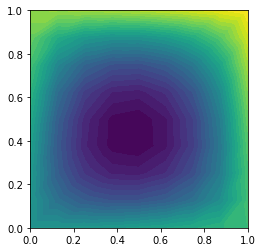

In [20]:
# Plot solution and mesh
dolfin.plot(u)
#dolfin.plot(mesh)

# Save solution to file in VTK format
with dolfin.XDMFFile(mesh.mpi_comm(), "output/bar.xdmf") as file: 
    file.write(u)
